In [63]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',None)

In [64]:
df = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ML for Cities\Final project\NYCclean_ML4C\Data\final_data_3481.csv')
df.head()

,Unnamed: 0,CD,Year,Month,dirty_level,Count311,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,fs_openhours,fs_open,trs_permits,paper_baskets,mgp_baskets,total_number_of_households,hh_compost_num,hh_compost_percent,shape_area,wfr_avg_recycling,wfr_avg_refuse,wfr_avg_bulk,bigbelly,seasonal_wire_litter_basket,highend_basket,publicspacereceptacle,wire_basket,total_litter_baskets,pct_bach_deg,over65_rate,under18_rate,pct_white_nh,poverty_rate,pct_hh_rent_burd,mean_commute,unemployment,crime_per_1000,pop_density,numbldgs,unitstotal,asland_sqft,pct_clean_strts,pct_lot_area_open_space,pct_lot_area_public_facility_institution,pct_lot_area_res_1_2_family_bldg,pct_lot_area_res_multifamily_walkup,restaurant,business
0,0,BK01,2016,11,2,50,5250.4,527.8,402.8,16.9,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,984
1,1,BK01,2016,12,2,36,5409.5,726.3,501.0,11.7,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,915
2,2,BK01,2017,1,2,51,5189.9,589.1,455.2,14.9,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,921
3,3,BK01,2017,2,3,61,4705.4,505.6,395.8,10.5,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,877
4,4,BK01,2017,3,3,67,5476.7,563.0,453.3,10.6,333.25,6.0,14.0,9.0,9.0,92610,9745,0.105226,0.001307,1.0,3.0,3.0,1.0,0.0,2.0,1.0,10.0,14.0,47.0,9.3,24.0,61.3,15.4,40.7,34.3,4.0,10.9,36626.118079,17147,100971,10.78427,86.4,5.19,5.33,5.25,16.9,217,886


In [65]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

## Normalize some variables by population or land area

In [66]:
#bring in population data
pops = pd.read_csv(r'C:\Users\Gabriel\OneDrive\CUSP\Spring 2022 Classes\ML for Cities\Final project\NYCclean_ML4C\Data\New_York_City_Population_By_Community_Districts.csv')
pops.head()

,Borough,CD Number,CD Name,1970 Population,1980 Population,1990 Population,2000 Population,2010 Population
0,Bronx,1,"Melrose, Mott Haven, Port Morris",138557,78441,77214,82159,91497
1,Bronx,2,"Hunts Point, Longwood",99493,34399,39443,46824,52246
2,Bronx,3,"Morrisania, Crotona Park East",150636,53635,57162,68574,79762
3,Bronx,4,"Highbridge, Concourse Village",144207,114312,119962,139563,146441
4,Bronx,5,"University Hts., Fordham, Mt. Hope",121807,107995,118435,128313,128200


In [67]:
pops['boro'] = pops['Borough'].replace({'Manhattan':'MN','Brooklyn':'BK','Queens':'QN','Staten Island':'SI','Bronx':'BX'})
pops['CD Number'] = pops['CD Number'].astype(str)
#pops['CD Number'] = np.where(len(pops['CD Number']) ==1, '0' + pops['CD Number'],pops['CD Number'])

In [68]:
#add a 0 before the single-digit CD numbers before concatenating to the boro
for r in pops.index:
    if len(pops.loc[r,'CD Number']) == 1:
        pops.loc[r,'CD Number'] = '0' + pops.loc[r,'CD Number']

In [69]:
pops['CD'] = pops['boro'] + pops['CD Number']

In [70]:
pops.rename({'2010 Population':'pop2010'},axis=1,inplace=True)

In [71]:
df = pd.merge(df,pops[['CD','pop2010']],how='left',left_on='CD',right_on='CD')

In [72]:
#variables to normalize by population: 
['Count311', 'REFUSETONSCOLLECTED','PAPERTONSCOLLECTED', 'MGPTONSCOLLECTED', 'RESORGANICSTONS']

#variables to normalize by land area
['paper_baskets','mgp_baskets','seasonal_wire_litter_basket', 'highend_basket',
       'publicspacereceptacle', 'wire_basket', 'total_litter_baskets', 'fs_open','restaurant', 'business']

# drop hh_compost_num, pct_clean_strts, pop2010,

Index(['CD', 'Year', 'Month', 'dirty_level', 'Count311', 'REFUSETONSCOLLECTED',
       'PAPERTONSCOLLECTED', 'MGPTONSCOLLECTED', 'RESORGANICSTONS',
       'fs_openhours', 'fs_open', 'trs_permits', 'paper_baskets',
       'mgp_baskets', 'total_number_of_households', 'hh_compost_num',
       'hh_compost_percent', 'shape_area', 'wfr_avg_recycling',
       'wfr_avg_refuse', 'wfr_avg_bulk', 'bigbelly',
       'seasonal_wire_litter_basket', 'highend_basket',
       'publicspacereceptacle', 'wire_basket', 'total_litter_baskets',
       'pct_bach_deg', 'over65_rate', 'under18_rate', 'pct_white_nh',
       'poverty_rate', 'pct_hh_rent_burd', 'mean_commute', 'unemployment',
       'crime_per_1000', 'pop_density', 'numbldgs', 'unitstotal',
       'asland_sqft', 'pct_clean_strts', 'pct_lot_area_open_space',
       'pct_lot_area_public_facility_institution',
       'pct_lot_area_res_1_2_family_bldg',
       'pct_lot_area_res_multifamily_walkup', 'restaurant', 'business',
       'pop2010'],
      dt

In [7]:
df.describe()

,Year,Month,dirty_level,Count311,REFUSETONSCOLLECTED,PAPERTONSCOLLECTED,MGPTONSCOLLECTED,RESORGANICSTONS,fs_openhours,fs_open,trs_permits,paper_baskets,mgp_baskets,total_number_of_households,hh_compost_num,hh_compost_percent,shape_area,wfr_avg_recycling,wfr_avg_refuse,wfr_avg_bulk,bigbelly,seasonal_wire_litter_basket,highend_basket,publicspacereceptacle,wire_basket,total_litter_baskets,pct_bach_deg,over65_rate,under18_rate,pct_white_nh,poverty_rate,pct_hh_rent_burd,mean_commute,unemployment,crime_per_1000,pop_density,numbldgs,unitstotal,asland_sqft,pct_clean_strts,pct_lot_area_open_space,pct_lot_area_public_facility_institution,pct_lot_area_res_1_2_family_bldg,pct_lot_area_res_multifamily_walkup,restaurant,business
count,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000,3481.000000
mean,2018.830508,6.491525,1.986785,48.743177,3628.617438,429.693019,434.024390,28.707182,347.061326,3.235564,1.032175,21.644068,22.457627,61594.033898,1717.745763,0.022517,0.001249,0.999621,2.475281,2.301667,0.627119,0.016949,3.983051,3.728814,8.593220,16.949153,36.881356,13.825424,20.820339,31.842373,19.650847,44.762712,41.261017,4.501695,10.820339,45110.495042,18619.841712,67166.440678,32.793899,94.162712,12.143898,10.120847,24.405932,11.572881,876.677966,652.303074
std,1.474886,3.481065,0.821303,35.505983,1400.135685,215.199459,187.303843,60.112245,582.652592,2.170785,2.384962,25.571637,29.387903,22133.098619,5233.762378,0.064135,0.001173,0.002887,0.472519,0.724279,1.990928,0.129099,5.332130,3.978607,6.099274,10.936546,19.425174,3.652113,5.226008,23.599901,7.277042,7.442431,6.334892,1.412917,7.850834,25267.157635,16369.566494,24736.268767,75.800713,7.741670,9.766513,5.605271,18.721626,7.366662,1037.125132,292.201369
min,2016.000000,1.000000,1.000000,3.000000,900.200000,71.500000,107.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20628.000000,0.000000,0.000000,0.000327,0.977635,2.000000,0.982499,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,11.300000,8.200000,8.400000,1.200000,6.300000,27.700000,24.000000,2.000000,2.500000,6208.770294,1692.000000,21902.000000,2.167357,61.700000,0.710000,2.500000,0.090000,0.630000,21.000000,197.000000
25%,2018.000000,3.000000,1.000000,25.000000,2476.500000,280.300000,306.800000,0.000000,30.100000,2.000000,0.000000,3.000000,3.000000,46403.000000,0.000000,0.000000,0.000512,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000,4.000000,9.000000,23.900000,10.700000,17.600000,10.700000,13.900000,40.400000,38.000000,3.300000,7.000000,23559.314173,4642.000000,50436.000000,6.943023,89.200000,3.810000,6.250000,5.670000,6.010000,192.000000,450.000000
50%,2019.000000,6.000000,2.000000,40.000000,3468.600000,403.200000,407.700000,0.000000,68.800000,3.000000,0.000000,13.000000,13.000000,58056.000000,0.000000,0.000000,0.000848,1.000000,2.396694,2.396694,0.000000,0.000000,2.000000,2.000000,8.000000,14.000000,31.700000,13.300000,21.300000,26.700000,19.600000,45.400000,43.500000,4.300000,9.400000,38177.603640,14525.000000,61225.000000,9.689811,98.000000,8.150000,8.830000,22.290000,10.260000,420.000000,609.000000
75%,2020.000000,10.000000,3.000000,62.000000,4627.100000,537.800000,528.600000,28.900000,292.400000,4.000000,1.000000,31.000000,33.000000,66780.000000,0.000000,0.000000,0.001495,1.000000,3.000000,3.000000,0.000000,0.000000,5.000000,5.000000,12.000000,22.000000,43.300000,16.500000,23.300000,50.700000,23.700000,49.400000,45.800000,5.400000,12.900000,58368.648787,25111.000000,75550.000000,16.060667,100.000000,19.8600

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn import tree
from IPython.display import Image  
import pydotplus

In [15]:
# split the data into training, validation, and test
X_train,X_test,y_train,y_test=train_test_split(df.loc[:,'REFUSETONSCOLLECTED':],df['dirty_level'], test_size=0.2, random_state=999)
X_train,X_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=999)

## Decision Tree Classifier

In [23]:
# learn a single decision tree classifier
dt=DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

# in sample accuracy
print('In sample accuracy:',dt.score(X_train,y_train))

# validation accuracy
print('Validation accuracy:',dt.score(X_val,y_val))

In sample accuracy: 0.651549169286035
Validation accuracy: 0.6104129263913824


In [27]:
y_train.value_counts()

1    761
3    735
2    731
Name: dirty_level, dtype: int64

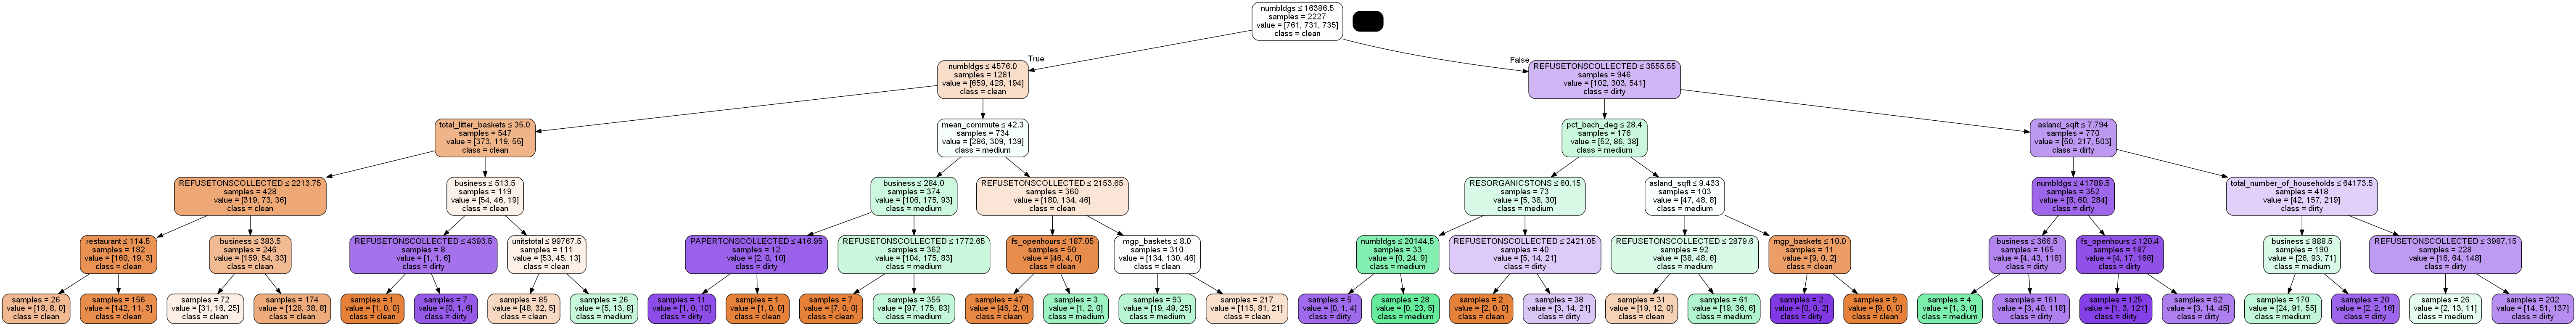

In [32]:
#visualize the graph
thestring = tree.export_graphviz(dt, out_file=None,  
                         feature_names=X_train.columns.values, 
                         class_names=['clean','medium','dirty'],  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False)
graph = pydotplus.graph_from_dot_data(thestring)  
Image(graph.create_png())

In [34]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(dt.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 10 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
32,numbldgs,0.513986
0,REFUSETONSCOLLECTED,0.176341
41,business,0.068905
34,asland_sqft,0.062727
8,mgp_baskets,0.029594
28,mean_commute,0.028129
9,total_number_of_households,0.02786
21,total_litter_baskets,0.027751
22,pct_bach_deg,0.024514
4,fs_openhours,0.01385


## Random Forest Classifier

In [44]:
rf = RandomForestClassifier(n_estimators=500, n_jobs=-1,max_depth=8)
rf.fit(X_train, y_train)
pred=rf.predict_proba(X_test)[:,1]
print(rf.score(X_val,y_val))

0.6660682226211849


In [45]:
Feature_importance=pd.DataFrame([list(X_train.columns),list(rf.feature_importances_)]).T
Feature_importance.columns=["variables","importance"]

# list the top 10 most important features in order
Feature_importance.sort_values(by="importance",ascending=False).iloc[:10,:]

,variables,importance
0,REFUSETONSCOLLECTED,0.121102
32,numbldgs,0.120289
2,MGPTONSCOLLECTED,0.083163
41,business,0.074831
1,PAPERTONSCOLLECTED,0.065981
34,asland_sqft,0.059224
33,unitstotal,0.057395
12,shape_area,0.046341
9,total_number_of_households,0.028477
3,RESORGANICSTONS,0.024917
